In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib widget

%config InlineBackend.figure_format='svg'


import numpy as np
from matplotlib import pyplot as plt


from morphing_birds import Hawk3D, plot, interactive_plot, plot_multiple, animate

np.set_printoptions(suppress=True, precision=3)



# Load the Average Hawk Shape


In [2]:
hawk3d = Hawk3D("../data/mean_hawk_shape.csv")

interactive_plot(hawk3d)

IntSlider(value=60, description='azimuth', max=90, min=-90, step=5)

IntSlider(value=20, description='elevation', max=90, min=-15, step=5)

Output()

## Alter the Body Pitch

In [3]:
hawk3d.transform_keypoints(bodypitch=60)
interactive_plot(hawk3d)

IntSlider(value=60, description='azimuth', max=90, min=-90, step=5)

IntSlider(value=20, description='elevation', max=90, min=-15, step=5)

Output()

No such comm: 4598e663a9c3466f88fdc1a69c47b892


## Animate Random Motion

Figure and axes initialized.


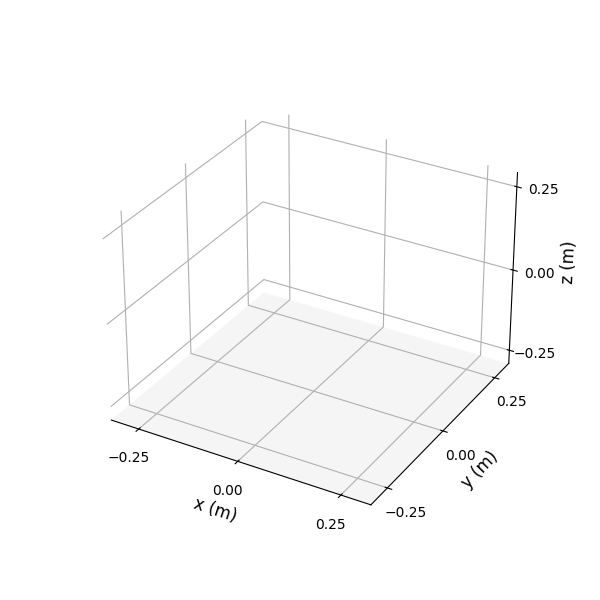

No such comm: 1ba888a2908b4f889348774989faf683
No such comm: 1ba888a2908b4f889348774989faf683


In [4]:
%matplotlib widget
# Make a set of keypoints by adding some random noise to the original keypoints
hawk3d.reset_transformation()
fake_keypoints = np.random.normal(0, 0.01, (100,8,3)) + hawk3d.markers


# Animate the random motion
animate(hawk3d, fake_keypoints, rotation_type="static")

# Can also try dynamic rotation
# animate(hawk3d, fake_keypoints, rotation_type="dynamic")


In [5]:
plt.close("all")

In [83]:
(9*0.5)*0.2


0.9

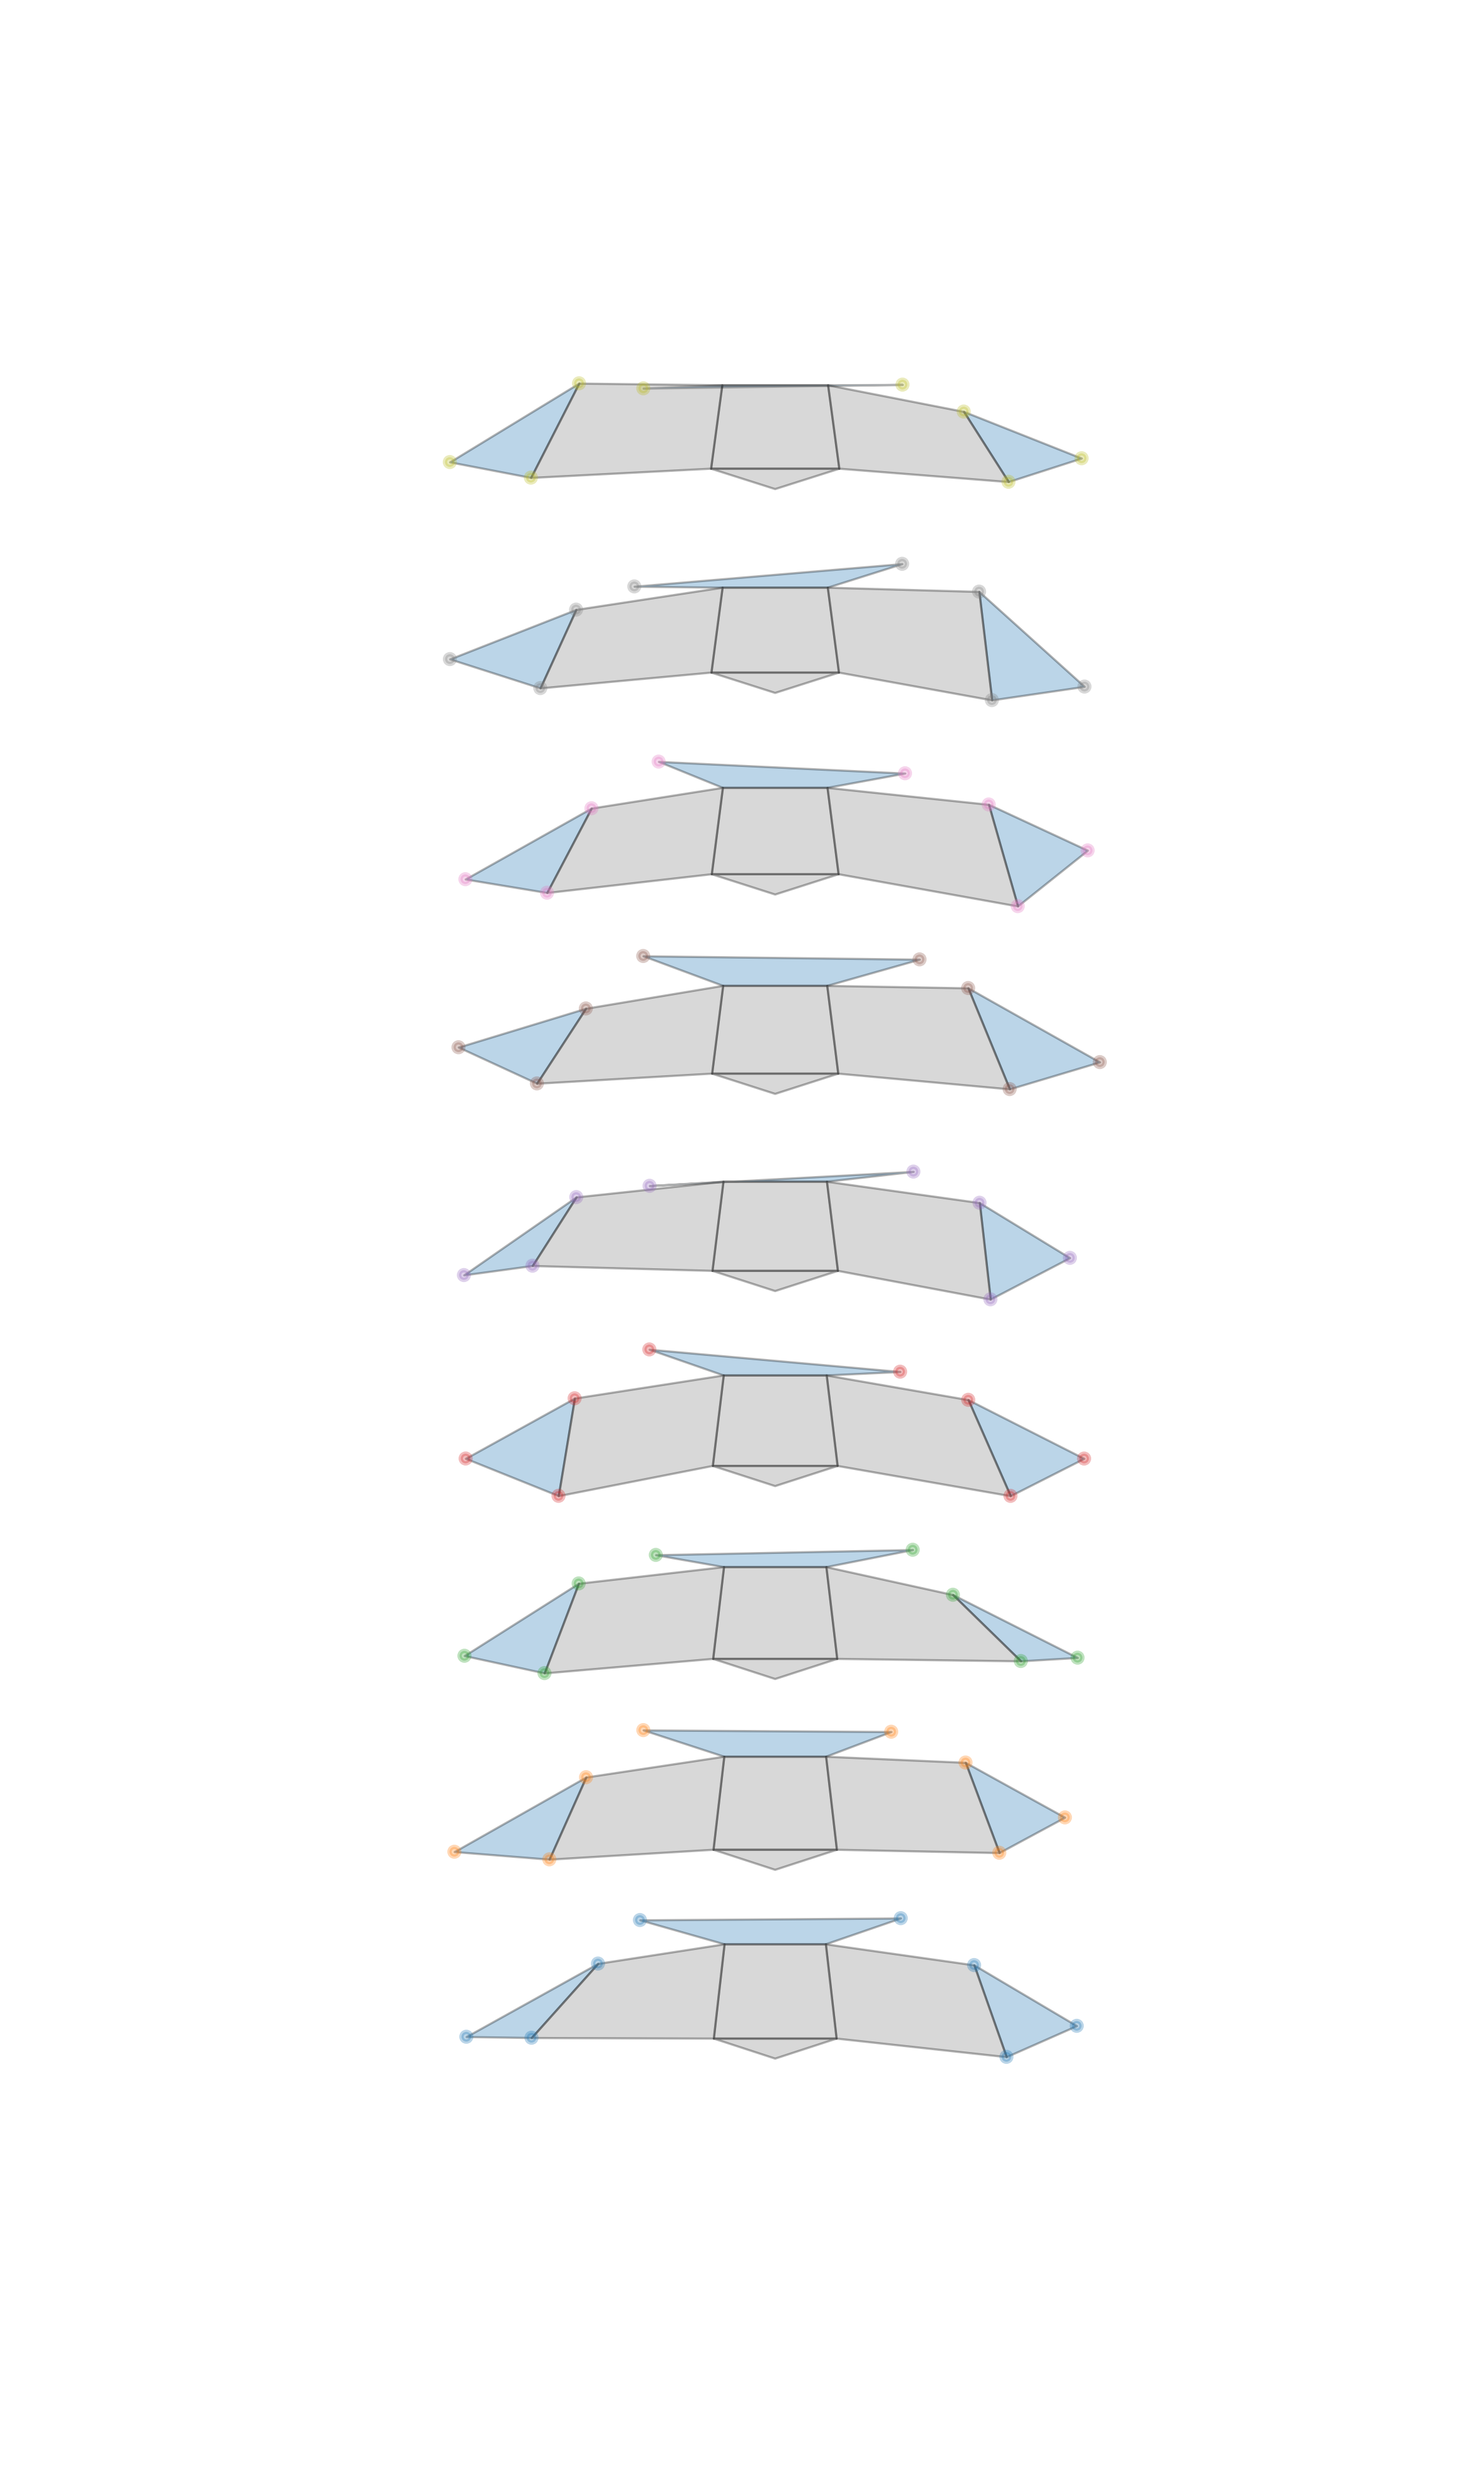

In [100]:
# from IPython.display import HTML


cropped_image = plot_multiple(hawk3d,fake_keypoints, 9, az=90, el=20)
display(cropped_image)